<a href="https://colab.research.google.com/github/ryskks/usedicom/blob/main/window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Windoe Level / Width を調節する

### まずは Googl Drive をマウントして，画像を読み込める状態にする

In [1]:
# Google Drive のマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 必要なパッケージのインストール

In [2]:
# 必要なパッケージのインストール
!pip install pydicom
!pip install matplotlib
!pip install -U python-gdcm
!pip install pylibjpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 80.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 必要モジュールの導入
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom

### 変数変数 `DIR` に DICOM ファイルまでのパスを示します

In [4]:
# DICOM ファイルの読み込み
DIR = "/content/drive/MyDrive/Colab Notebooks/DICOM/ct2.dcm"
d = pydicom.read_file(DIR)

### 通常通り画像を表示させますが，頭蓋骨ははっきりと観察できるのに対して，頭蓋内は観察できません．

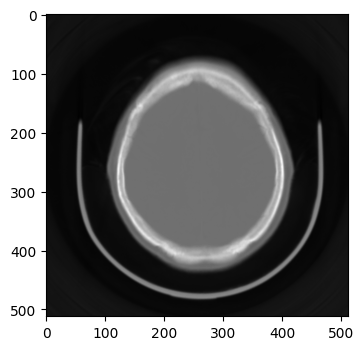

In [5]:
# 画像データを変数に代入
img = d.pixel_array

# 表示サイズを変更
fig = plt.figure(dpi=100)

# 画像表示
plt.imshow(img, cmap='gray')
plt.show()

### Python で画像表示した場合 CT 値の最大値から最小値の間で 256 分割され，グレイスケールに変換されます．なので，そのままではのっぺりした画像となります．

通常，表現したい CT 値の領域を WW として指定し，その中心を WL として指定してあげるわけですが ，Python では、最小の CT 値と最大の CT を指定します．

`vmin =`

で最小の CT 値を指定し

`vmax =`

で最大の CT 値を指定してあげることで．好みの条件にて表示することが可能となります．

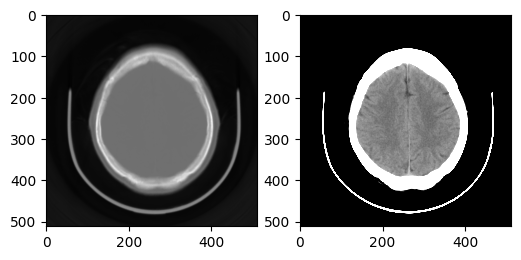

In [6]:
# 画像データを変数に代入
img = d.pixel_array

# ウィンドウ処理
# 上の plt.imshow(img, cmap='gray')
# に対して，vmax, vmin を追加 

min = 0
max = 70

# 表示サイズを変更
fig = plt.figure(dpi=100)

plt.subplot (1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot (1, 2, 2)
plt.imshow(img, cmap='gray', vmin=min, vmax=max)
plt.show()

どうでしょうか．頭蓋内が確認できるようになったでしょうか．
頭蓋骨骨折を観察したい場合や，脳内出血や腫瘍を見たい場合で，WW/WL を変更する必要性が
あることがよく理解できたでしょう．

また，DICOM ファイルの情報から以下のようにして，WW/WL を調節することも可能です．

WW と WL を提示すると，上下のグレイレベル，すなわち最大値以上は白，最小値以下は黒を計算することができる．

上のグレイレベルは，WL + (WW ÷ 2) で計算されます
下のグレイレベルは WL - (WW ÷ 2) で計算される
例えば，脳は WW：80, WL: 40 なので，+80 以上の値はすべて白，0 以下の値はすべて黒となります

wl : 50 ww : 75


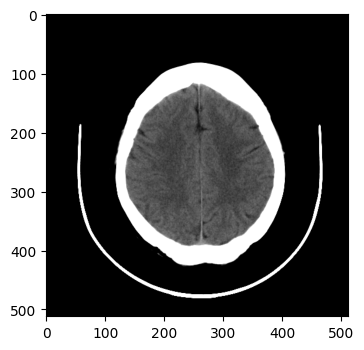

In [7]:
# 画像データを変数に代入
img = d.pixel_array

# ウィンドウレベルと幅の情報を DICOM から取得
wl = d.WindowCenter
ww = d.WindowWidth
print("wl :", wl, "ww :", ww)

#ウィンドウ処理
max = wl + ww /2
min = wl - ww /2
img = 255 * (img - min) / (max - min)
img[img > 255] = 255
img[img < 0] = 0

# 表示サイズを変更
fig = plt.figure(dpi=100)
plt.imshow(img, cmap='gray')
plt.show()

よりインタラクティブに変更したければ

In [8]:
# 必要なモジュール類の準備
!pip install ipywidgets
from matplotlib.widgets import Slider
from ipywidgets import interact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


### インタラクティブに変更もできます

In [9]:
# 初期値
wl = 50
ww = 100

def func(wl, ww):
    # 画像データを変数に代入
    img = d.pixel_array

    max = wl + ww /2
    min = wl - ww /2
    img = 255 * (img - min) / (max - min)
    img[img > 255] = 255
    img[img < 0] = 0

    # 表示サイズを変更
    fig = plt.figure(dpi=100)  
    plt.imshow(img, cmap='gray', vmax = max, vmin = min)
    plt.show()
interact(func, wl = (0, 255) , ww = (0, 255));

interactive(children=(IntSlider(value=127, description='wl', max=255), IntSlider(value=127, description='ww', …